Pandey.A "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

#lasso regression
from sklearn import linear_model

#f_regression (feature selection)
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

# recursive feature selection (feature selection)
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.formula.api import ols

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

#for validating your classification model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

#import knnclassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
from pandas.plotting import parallel_coordinates

## Background
- predict the success of a movie based on traits related to examples given to compare in the IMDB database.
- data used to analyze the success of a movie would be: previous lead actor, budget, money spent on marketing, is the movie a sequel/prequel/original.
- Facebook popularity of director and the top 3 actors in the movie, duration of the movie, and the number of faces on the posters

### Collect data
- Duration
- Number of votes
- Social media popularity of the movie
- Social media popularity of the top three actors
- Social media popularity of the director
- Success of director's past movies
- ROI ratio
- Profit
- Budget

## What variables are highly correlated to imdb score?
- Director's past success
- Number of votes is highly correlated to IMDb score
- Duration is highly correlated to a movie's success
- Number of critics who reviewed the movie
- Numbmer of users who reviewed the movie
- Social Media popularity of the movie
- Gross earnings
- Social Media popularity of the director

## Data Understanding

In [2]:
#load the data
df = pd.read_csv("movie_metadata.csv_movie_metadata.csv")

In [5]:
# Check columns, data type
print df.columns
print len(df)
print df.info()

Index([u'color', u'director_name', u'num_critic_for_reviews', u'duration',
       u'director_facebook_likes', u'actor_3_facebook_likes', u'actor_2_name',
       u'actor_1_facebook_likes', u'gross', u'genres', u'actor_1_name',
       u'movie_title', u'num_voted_users', u'cast_total_facebook_likes',
       u'actor_3_name', u'facenumber_in_poster', u'plot_keywords',
       u'movie_imdb_link', u'num_user_for_reviews', u'language', u'country',
       u'content_rating', u'budget', u'title_year', u'actor_2_facebook_likes',
       u'imdb_score', u'aspect_ratio', u'movie_facebook_likes'],
      dtype='object')
5043
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes    

- Dataset contains 28 columns and has 5043 movies
- Some movies have incomplete data
- 4159 movies have gross profit, gross profit can determine how well a movie does
- The movies without gross profit could be removed
- all data are floats or objects, except for facebook likes
- Objects data type will need to be converted to int by use of dummy variables as correlation cannot be done as catagorical data type
- floats and objects and int64

In [7]:
# Check for any missing values
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

### The data currently has a significant amount of missing values that could affect the accuracy of the rating prediction system.
- Any rows with missing values will be removed.

### Some new columns could be created to better analyze the data:
- Top 3 actors' total Facebook likes combined into one column
- ROI ratio = (profit/budget)
- Proportionate average IMDb score for each director = total score for all movies made by that director / total movies made by that director

### Columns can be removed to remove redundancy or extraneous/insignificant information:
- actor 1 facebook likes
- actor 2 facebook likes
- actor 3 facebook likes
- color
- language
- aspect ratio
- movie imdb link
- genres
- plot keywords

In [8]:
# Shows count of all movies in terms of movie facebook likes sorted by IMDb score
df.groupby('imdb_score').movie_facebook_likes.value_counts()

imdb_score  movie_facebook_likes
1.6         62000                   1
1.7         0                       1
1.9         0                       2
            128                     1
2.0         0                       1
            446                     1
2.1         0                       2
            244                     1
2.2         150                     1
            353                     1
            881                     1
2.3         0                       1
            724                     1
            1000                    1
2.4         0                       1
            2000                    1
2.5         0                       1
            777                     1
2.6         200                     1
            2000                    1
2.7         0                       3
            115                     1
            131                     1
            806                     1
2.8         0                       2
            10   

In [10]:
# Shows count of all movies in terms of duration, sorted by IMDb score.
df.groupby('imdb_score')['duration'].value_counts()

imdb_score  duration
1.6         115.0       1
1.7         91.0        1
1.9         88.0        2
            97.0        1
2.0         93.0        1
            110.0       1
2.1         90.0        1
            95.0        1
            104.0       1
2.2         83.0        1
            94.0        1
            122.0       1
2.3         93.0        1
            94.0        1
            95.0        1
2.4         119.0       1
            121.0       1
2.5         93.0        1
            97.0        1
2.6         76.0        1
            80.0        1
2.7         82.0        1
            85.0        1
            86.0        1
            96.0        1
            100.0       1
            140.0       1
2.8         76.0        1
            77.0        1
            80.0        1
                       ..
8.7         44.0        1
            55.0        1
            78.0        1
            87.0        1
            125.0       1
            133.0       1
            136.0

In [11]:
# The amount of gross value, sorted by IMDb rating
df.groupby('imdb_score').gross.value_counts()

imdb_score  gross      
1.6         73000942.0     1
1.9         9109322.0      1
            14174654.0     1
2.0         5694308.0      1
2.1         4273372.0      1
            4922166.0      1
            7009668.0      1
2.2         17010646.0     1
2.3         306715.0       1
            5132655.0      1
            39737645.0     1
2.4         5660084.0      1
            21471685.0     1
2.5         27141959.0     1
2.7         3713002.0      1
            9353573.0      1
            38232624.0     1
            48546578.0     1
2.8         1646664.0      1
            1686429.0      1
            7382993.0      1
            11144518.0     1
            20763013.0     1
2.9         1550000.0      1
            13235267.0     1
3.0         2315683.0      1
            7059537.0      1
            18990542.0     1
3.1         13998282.0     2
            4131640.0      1
                          ..
8.5         448130642.0    1
8.6         163245.0       1
            6712241

## Data Preparation

In [13]:
# Remove missing values
dropped = df.dropna()

In [14]:
# Organize the ratings
cleaned = dropped.replace({'content_rating': 'M'},{'content_rating': 'PG'})
cleaned = cleaned.replace({'content_rating': 'GP'},{'content_rating': 'PG'})
cleaned = cleaned.replace({'content_rating': 'X'},{'content_rating': 'NC-17'})

cleaned = cleaned.replace({'content_rating': 'Approved'},{'content_rating': 'R'})
cleaned = cleaned.replace({'content_rating': 'Not Rated'},{'content_rating': 'R'})
cleaned = cleaned.replace({'content_rating': 'Passed'},{'content_rating': 'R'})
cleaned = cleaned.replace({'content_rating': 'Unrated'},{'content_rating': 'R'})

In [15]:
# Check 
cleaned.content_rating.unique()

array(['PG-13', 'PG', 'G', 'R', 'NC-17'], dtype=object)

In [16]:
# Drop insignificant variable
df1 = cleaned.drop(['color','language','aspect_ratio', 'movie_imdb_link', 'genres', 'plot_keywords', 'actor_1_facebook_likes', 'actor_2_facebook_likes','actor_3_facebook_likes'], axis=1)

In [17]:
# Create a profit column
df1['profit'] = df1.gross - df1.budget

In [18]:
# Check that all columns were created/removed/changed appropriately
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3756 entries, 0 to 5042
Data columns (total 20 columns):
director_name                3756 non-null object
num_critic_for_reviews       3756 non-null float64
duration                     3756 non-null float64
director_facebook_likes      3756 non-null float64
actor_2_name                 3756 non-null object
gross                        3756 non-null float64
actor_1_name                 3756 non-null object
movie_title                  3756 non-null object
num_voted_users              3756 non-null int64
cast_total_facebook_likes    3756 non-null int64
actor_3_name                 3756 non-null object
facenumber_in_poster         3756 non-null float64
num_user_for_reviews         3756 non-null float64
country                      3756 non-null object
content_rating               3756 non-null object
budget                       3756 non-null float64
title_year                   3756 non-null float64
imdb_score                   3756 non

## Data Visualization

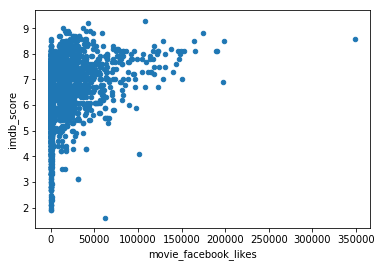

In [19]:
#scatter plot to show relationship between movie facebook likes and the IMDB score
df1.plot.scatter(x='movie_facebook_likes', y='imdb_score')

Higher imdb score has higher number of movie facbook likes

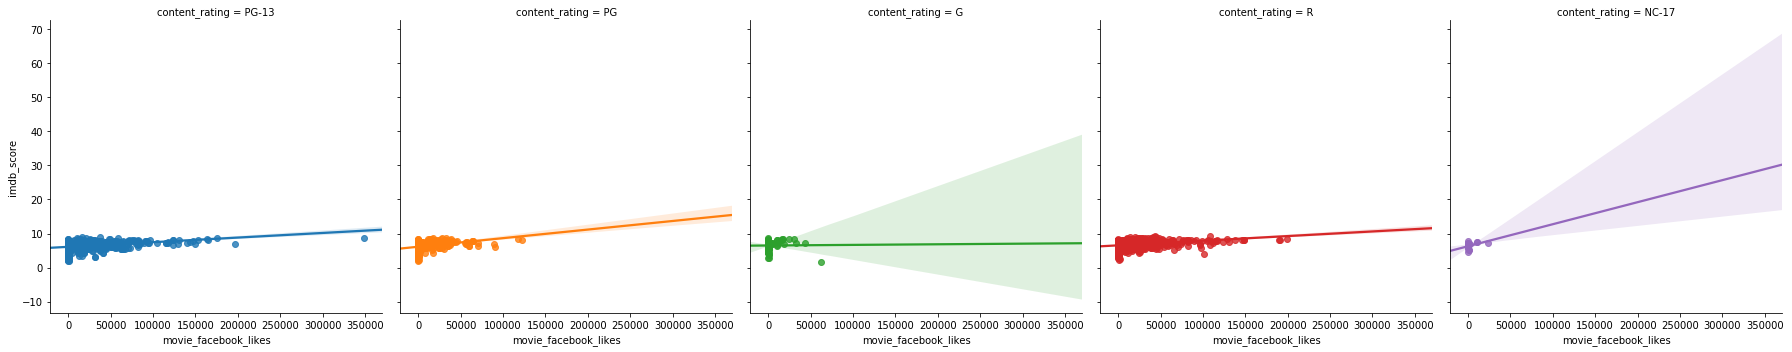

In [20]:
#compares relationship between movie facebook likes to IMDB score separate by the content ratings
sns.lmplot("movie_facebook_likes", "imdb_score", df1, col="content_rating", hue="content_rating", x_jitter=.15, size=5)

NC-17 movies has a wide range for possible likes with imdb score. Content rating R the amount of likes does not effect the imdb score much, similar trend is also seen for PG-13 and PG

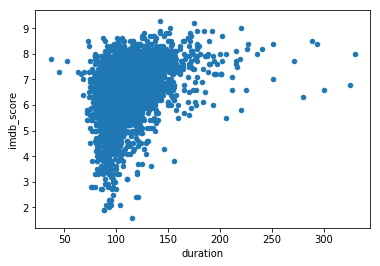

In [21]:
#scatter plot to show relationship between duration and the IMDB score
df1.plot.scatter(x='duration', y='imdb_score')

There is more of a cluster between the relationship between imdb score and the duration of the movie. There is indication that the longer the movie the higher the imdb score

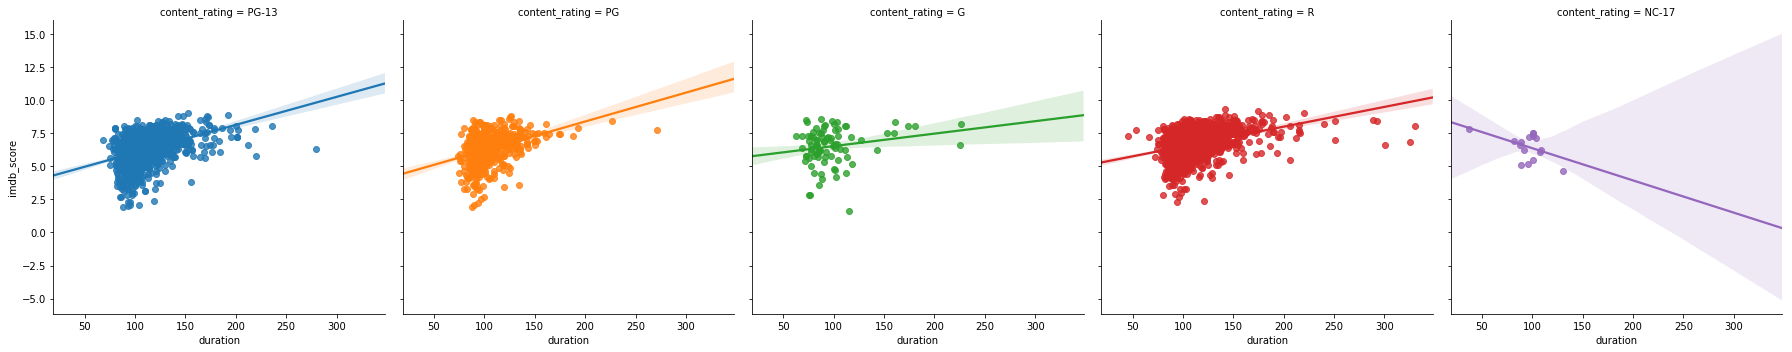

In [23]:
#compares relationship between duration to IMDB score separate by the content ratings
sns.lmplot("duration", "imdb_score", df1, col="content_rating", hue="content_rating", x_jitter=.15, size=5)

see more of the relationship between imdb score and duration NC-17 rating is the category with negative relationship a weak realtionship for G rated movies; suited for children, have short attention span content rating R have more movies with longer duration

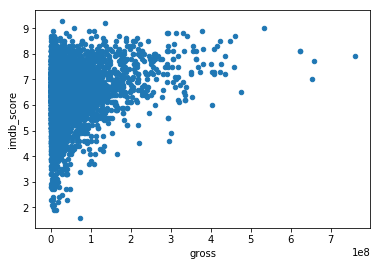

In [24]:
#scatter plot to show relationship between gross profit and the IMDB score
df1.plot.scatter(x='gross', y='imdb_score')

Higher imdb score has higher amount of gross profit

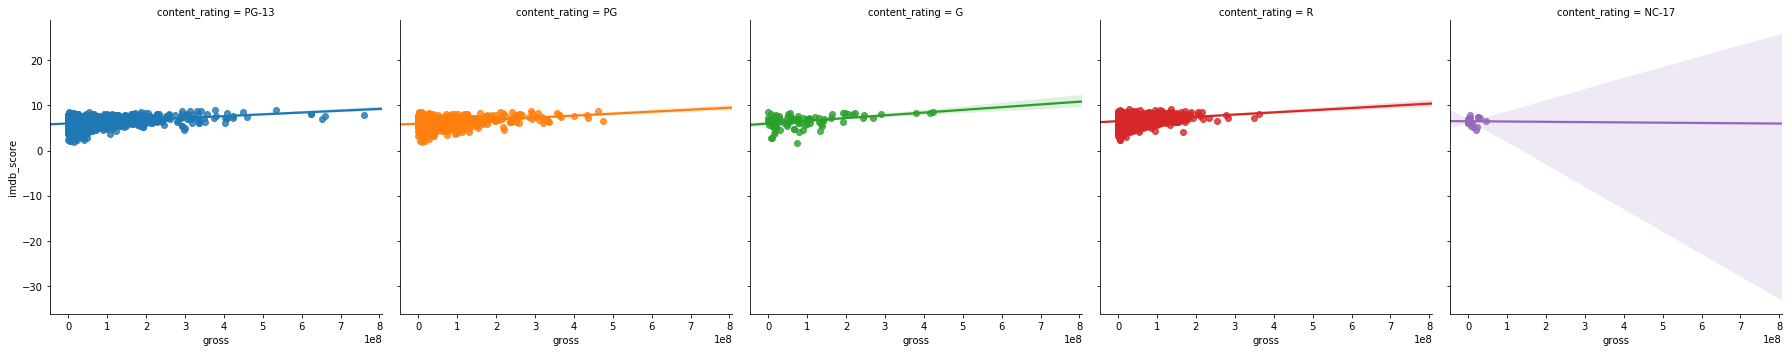

In [25]:
#compares relationship between gross profit to IMDB score separate by the content ratings
sns.lmplot("gross", "imdb_score", df1, col="content_rating", hue="content_rating", x_jitter=.15, size=5)

There is a positive relationship between imdb score and gross profit. For each content rating the higher imdb score the gross profit increases. However, in the case for the content rating NC-17 has a wider range for unpredictable result.

## Correlation Analysis

In [38]:
# Change content rating column from object to numeric
conr= pd.get_dummies(df1['content_rating'],prefix='content_rating')
df1= df1.join(conr)

In [41]:
df1_corr = df_corr.drop(['director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'movie_title', 'country'], axis=1)

In [43]:
#test correlation
df1_corr.corr()

,num_critic_for_reviews,duration,director_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,content_rating,budget,title_year,imdb_score,movie_facebook_likes,profit
num_critic_for_reviews,1.000000,0.228631,0.175128,0.464187,0.592473,0.236533,-0.034365,0.563684,0.069851,0.104717,0.420202,0.347886,0.705226,0.039029
duration,0.228631,1.000000,0.180644,0.245726,0.339592,0.120179,0.026919,0.351595,0.090448,0.068012,-0.130211,0.366221,0.215303,0.008296
director_facebook_likes,0.175128,0.180644,1.000000,0.138351,0.299624,0.118547,-0.048067,0.217103,0.012837,0.018167,-0.044656,0.192314,0.161962,0.024455
gross,0.464187,0.245726,0.138351,1.000000,0.624949,0.235601,-0.032025,0.544674,-0.276183,0.099496,0.054808,0.214740,0.366933,0.208033
num_voted_users,0.592473,0.339592,0.299624,0.624949,1.000000,0.249119,-0.032209,0.778881,0.007462,0.065927,0.023687,0.482430,0.517751,0.126327
cast_total_facebook_likes,0.236533,0.120179,0.118547,0.235601,0.249119,1.000000,0.080687,0.178675,-0.009827,0.028682,0.127045,0.106803,0.205564,0.043862
facenumber_in_poster,-0.034365,0.026919,-0.048067,-0.032025,-0.032209,0.080687,1.000000,-0.080971,0.017135,-0.021673,0.070093,-0.065493,0.015185,0.011510
num_user_for_reviews,0.563684,0.351595,0.217103,0.544674,0.778881,0.178675,-0.080971,1.000000,0.045573,0.070372,0.019470,0.325003,0.370465,0.097406
content_rating,0.069851,0.090448,0.012837,-0.276183,0.007462,-0.009827,0.017135,0.045573,1.000000,-0.035209,-0.014291,0.133825,0.011394,-0.049856
budget,0.104717,0.068012,0.018167,0.099496,0.065927,0.028682,-0.021673,0.070372,-0.035209,1.000000,0.047138,0.029190,0.052490,-0.952570


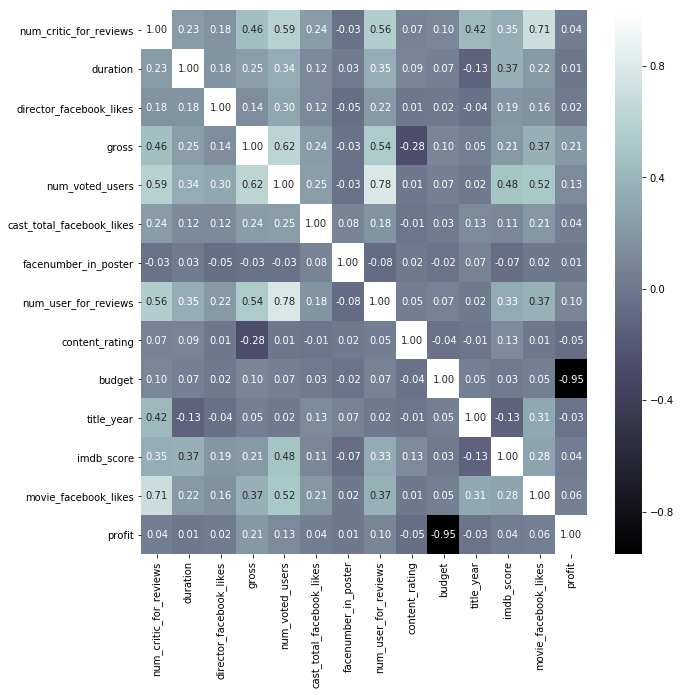

In [34]:
# Correlation heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df1_corr.corr(), annot=True, fmt=".2f", cmap='bone')

Notable variable being the one with high correlation to imdb score are
duration
gross
- duration - 0.37
- director_facebook_likes - 0.19
- gross - 0.21
- num_voted_users - 0.48
- cast_total_facebook_likes - 0.11
- num_user_for_reviews - 0.33
- movie_facebook_likes - 0.28
- content_rating_R - 0.17


are the most correlated with imdb score

In [46]:
df_corr.drop
df1_corr = df_corr.drop([ 'profit', 'budget', 'facenumber_in_poster', 'title_year', 'content_rating', 'cast_total_facebook_likes'], axis=1)

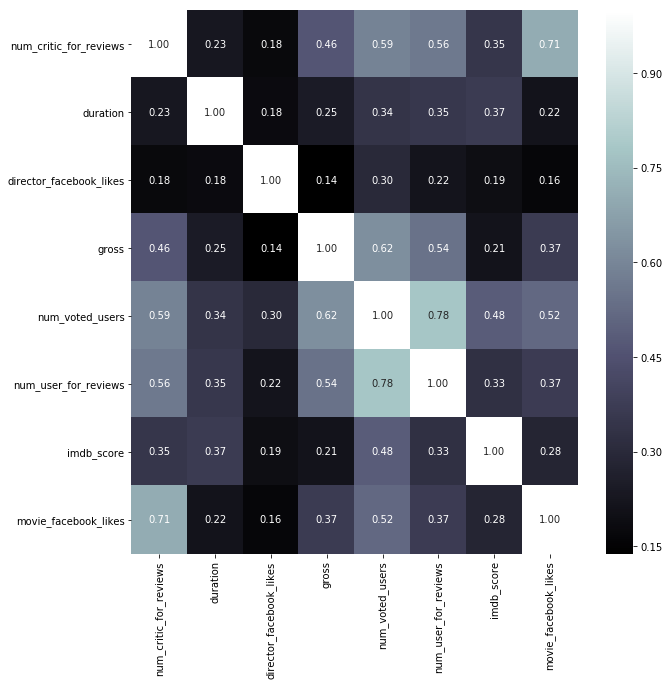

In [47]:
# Correlation heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df1_corr.corr(), annot=True, fmt=".2f", cmap='bone')

Further correlation by heatmap shows the top correlating factor when determining success of a movie
- num_voted_user are at 0.48
- duration are at 0.37
- num_user_for_review are at 0.33
- movie_facebook_likes are at 0.28
- gorss are at 0.21
- director_facebook_likes are at 0.19
- content_rating_R are at 0.17
- cast_total_facebook_likes are at 0.11

## Storytelling

There are many factors that goes into predicting the success of a movie. The higest correlation of a movie's success is dependent upon number of voted users, duration of the momvie, and number of user that leaves reviews. 

The movies with longer duration with R rated content have more success than a longer duration movie with G rated content; they are not a big influence effecting the IMDB score. 

The more the movie gain in popularity in the form of votes, revies and likes on facebook greatly influences the potential of a movies to be a success. 

However, from the correlation analysis it appears that the profit for a moves does not correlate to the success of a movie; this applies to all movies regardless of big or small budget. 

## Categorization

In [48]:
# Reuse a previously cleaned data
final = df_corr
final.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_2_name,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,num_user_for_reviews,country,content_rating,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,178.0,0.0,Joel David Moore,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,3054.0,USA,2,237000000.0,2009.0,7.9,33000,523505847.0
1,Gore Verbinski,302.0,169.0,563.0,Orlando Bloom,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,1238.0,USA,2,300000000.0,2007.0,7.1,0,9404152.0
2,Sam Mendes,602.0,148.0,0.0,Rory Kinnear,200074175.0,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,994.0,UK,2,245000000.0,2015.0,6.8,85000,-44925825.0
3,Christopher Nolan,813.0,164.0,22000.0,Christian Bale,448130642.0,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,2701.0,USA,2,250000000.0,2012.0,8.5,164000,198130642.0
5,Andrew Stanton,462.0,132.0,475.0,Samantha Morton,73058679.0,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,738.0,USA,2,263700000.0,2012.0,6.6,24000,-190641321.0


In [59]:
# Drop categorical columns
final1 = final.drop(['director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'movie_title', 'country'], axis=1)

In [60]:
# Categorize according to IMDB score movies (bad[1], okay[2], good[3], excellent[4])
final1['category'] = 1
final1['category'][(final1['imdb_score'] >= 4) & (final1['imdb_score'] < 6)] = 2
final1['category'][(final1['imdb_score'] >= 6) & (final1['imdb_score'] < 8)] = 3
final1['category'][final1['imdb_score'] > 8] = 4

C:\Users\Aksorn\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Aksorn\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Aksorn\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


### Simple Regression

In [61]:
# X & y
y = final1['imdb_score']
X = final1.drop(['category', 'imdb_score'], axis=1)

In [62]:
#model
reg_model = ols("imdb_score~num_critic_for_reviews+duration+director_facebook_likes+gross+num_voted_users+cast_total_facebook_likes+facenumber_in_poster+num_user_for_reviews+content_rating+budget+title_year+movie_facebook_likes+profit", final1)
reg = reg_model.fit()
print reg.summary()

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     175.5
Date:                Wed, 05 Dec 2018   Prob (F-statistic):               0.00
Time:                        22:36:47   Log-Likelihood:                -4696.3
No. Observations:                3756   AIC:                             9419.
Df Residuals:                    3743   BIC:                             9500.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

### Lasso

In [63]:
#Fit model
lasso = lm.Lasso(alpha = 0.1)
lasso.fit(X, y)
lasso_y = lasso.predict(X)

In [64]:
print 'Coefficients: ', lasso.coef_
print "y-intercept ", lasso.intercept_

Coefficients:  [ 2.67258408e-03  9.96332922e-03  3.71891707e-06 -2.09468574e-09
  3.76737025e-06 -6.00420875e-07 -2.22431674e-03 -6.10442075e-04
  0.00000000e+00 -3.33994097e-10 -2.23375548e-02 -2.67181965e-06
 -2.94167708e-10]
y-intercept  49.627446200551546


In [65]:
coef = ["%.3f" % i for i in lasso.coef_]
xcolumns = [ i for i in X.columns ]
zip(xcolumns, coef)

[('num_critic_for_reviews', '0.003'),
 ('duration', '0.010'),
 ('director_facebook_likes', '0.000'),
 ('gross', '-0.000'),
 ('num_voted_users', '0.000'),
 ('cast_total_facebook_likes', '-0.000'),
 ('facenumber_in_poster', '-0.002'),
 ('num_user_for_reviews', '-0.001'),
 ('content_rating', '0.000'),
 ('budget', '-0.000'),
 ('title_year', '-0.022'),
 ('movie_facebook_likes', '-0.000'),
 ('profit', '-0.000')]

In [66]:
a = zip(xcolumns, coef)
df = pd.DataFrame(a)
df.sort_values(1, ascending=False)

,0,1
1,duration,0.010
0,num_critic_for_reviews,0.003
2,director_facebook_likes,0.000
4,num_voted_users,0.000
8,content_rating,0.000
10,title_year,-0.022
6,facenumber_in_poster,-0.002
7,num_user_for_reviews,-0.001
3,gross,-0.000
5,cast_total_facebook_likes,-0.000


In [67]:
print "variance or r-squared: ", explained_variance_score(y, lasso_y)

variance or r-squared:  0.35441925128803764


### F Selection

In [68]:
# Using f_selection to determine the 3 most important factors
X_new = SelectKBest(f_regression, k=3).fit_transform(X, y)
X_new

array([[7.23000e+02, 1.78000e+02, 8.86204e+05],
       [3.02000e+02, 1.69000e+02, 4.71220e+05],
       [6.02000e+02, 1.48000e+02, 2.75868e+05],
       ...,
       [1.43000e+02, 7.70000e+01, 7.26390e+04],
       [5.60000e+01, 8.10000e+01, 5.20550e+04],
       [4.30000e+01, 9.00000e+01, 4.28500e+03]])

In [69]:
final1.head(1)

,num_critic_for_reviews,duration,director_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,content_rating,budget,title_year,imdb_score,movie_facebook_likes,profit,category
0,723.0,178.0,0.0,760505847.0,886204,4834,0.0,3054.0,2,237000000.0,2009.0,7.9,33000,523505847.0,3


In [70]:
# F Selection 
# Show the calculated R^2 value of the model
f_reg = lm.LinearRegression()
f_reg.fit(X_new, y)
f_reg_y = f_reg.predict(X_new)

print "r-squared: ", explained_variance_score(y, f_reg_y)

r-squared:  0.28384159215010973


In [72]:
f_reg = ols("imdb_score~duration+num_voted_users", final1)
f_reg = f_reg.fit()
print f_reg.summary()

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     726.3
Date:                Wed, 05 Dec 2018   Prob (F-statistic):          2.34e-267
Time:                        22:39:06   Log-Likelihood:                -4920.1
No. Observations:                3756   AIC:                             9846.
Df Residuals:                    3753   BIC:                             9865.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           4.9912      0.074     

### Recursive Feature Selection

In [73]:
lr = lm.LinearRegression()
rfe = RFE(lr, n_features_to_select=2)
rfe_y = rfe.fit(X,y)

print "Features sorted by their rank:"
print sorted(zip(map(lambda x: x, rfe.ranking_), X.columns))

Features sorted by their rank:
[(1, 'content_rating'), (1, 'facenumber_in_poster'), (2, 'duration'), (3, 'title_year'), (4, 'num_critic_for_reviews'), (5, 'num_user_for_reviews'), (6, 'director_facebook_likes'), (7, 'num_voted_users'), (8, 'movie_facebook_likes'), (9, 'cast_total_facebook_likes'), (10, 'gross'), (11, 'budget'), (12, 'profit')]


Recursive Feature Selection lists content_rating and face number in poster as the most important

### Normalization

In [74]:
from sklearn.preprocessing import Normalizer

y = final1['imdb_score'] 
X = final1.drop(['imdb_score','category'], axis =1)

scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
normalizedX

array([[ 7.58494744e-07,  1.86738678e-07,  0.00000000e+00, ...,
         2.10762924e-06,  3.46200921e-05,  5.49206686e-01],
       [ 7.00585577e-07,  3.92049545e-07,  1.30605854e-06, ...,
         4.65587832e-06,  0.00000000e+00,  2.18159379e-02],
       [ 1.88426015e-06,  4.63240036e-07,  0.00000000e+00, ...,
         6.30695050e-06,  2.66050021e-04, -1.40617843e-01],
       ...,
       [ 2.38123315e-04,  1.28220247e-04,  4.84572621e-04, ...,
         3.33705681e-03,  3.16387622e-02,  6.95653120e-01],
       [ 1.94320928e-05,  2.81071342e-05,  0.00000000e+00, ...,
         6.91227299e-04,  0.00000000e+00,  7.05773609e-01],
       [ 3.58792843e-04,  7.50961764e-04,  1.33504314e-04, ...,
         1.67214153e-02,  3.80487294e-03,  7.01915617e-01]])

In [75]:
model = lm.LinearRegression()
model.fit(normalizedX, y)
model_y = model.predict(normalizedX)
print 'Coefficients: ', model.coef_
print "y-intercept ", model.intercept_

Coefficients:  [ 1.70216681e+03  1.87977025e+04 -1.16738045e+01 -2.15914512e-01
  3.67615601e+01 -6.26186239e+00 -4.47888392e+04 -5.76857240e+03
 -8.70828188e+04 -5.44655809e-01 -6.80988723e+02  1.10238796e+01
  3.28740845e-01]
y-intercept  6.828669386193066


In [76]:
print "mean square error: ", mean_squared_error(y, model_y)
print explained_variance_score(y, model_y)

mean square error:  0.9988610386676314
0.10444978673425698


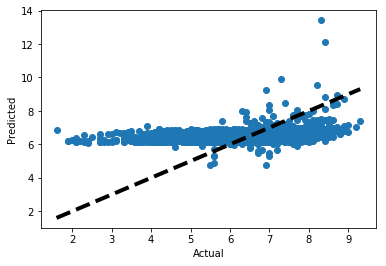

In [77]:
plt.subplots()
plt.scatter(y, model_y)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)   #dotted line represents perfect prediction (actual = predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Does not accurately predict the outcome of a movie's success

### Random Forest Regressor

In [78]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

#X and Y variables
y = final1['imdb_score'] 
X = final1.drop(['imdb_score','category'], axis =1)

regr = RandomForestRegressor(random_state=0)
regr.fit(X, y)
regr_predicted = regr.predict(X)

print "mean square error: ", mean_squared_error(y, regr_predicted)
print "variance or r-squared: ", explained_variance_score(y, regr_predicted)

mean square error:  0.09625165069222578
variance or r-squared:  0.9137135510078213


In [79]:
sorted(zip(regr.feature_importances_, X.columns))

[(0.01810428933122047, 'facenumber_in_poster'),
 (0.021885581358237646, 'content_rating'),
 (0.033426625438065835, 'movie_facebook_likes'),
 (0.03841854679841375, 'director_facebook_likes'),
 (0.04020932707176314, 'profit'),
 (0.04190816496290684, 'title_year'),
 (0.0541601719904309, 'cast_total_facebook_likes'),
 (0.0548744761958256, 'num_critic_for_reviews'),
 (0.06156492208719139, 'gross'),
 (0.0759548032765498, 'num_user_for_reviews'),
 (0.11324915368308638, 'budget'),
 (0.11930584350619614, 'duration'),
 (0.32693809430011206, 'num_voted_users')]

### Decision Tree

In [80]:
# X variables and y variable
y = final1['category'] 
X = final1.drop(['imdb_score','category'], axis =1)

In [81]:
# split validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize DecisionTreeClassifier()
dt = DecisionTreeClassifier()

# Train a decision tree model
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [82]:
print len(X_train), len(y_train)
print len(X_test), len(y_test)

2629 2629
1127 1127


In [83]:
print metrics.accuracy_score(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, dt.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, dt.predict(X_test))
print "--------------------------------------------------------"

0.686779059449867
--------------------------------------------------------
[[  8  12  23   2]
 [ 15 156 119   0]
 [ 19 124 578  19]
 [  5   1  14  32]]
--------------------------------------------------------
             precision    recall  f1-score   support

          1       0.17      0.18      0.17        45
          2       0.53      0.54      0.54       290
          3       0.79      0.78      0.78       740
          4       0.60      0.62      0.61        52

avg / total       0.69      0.69      0.69      1127

--------------------------------------------------------


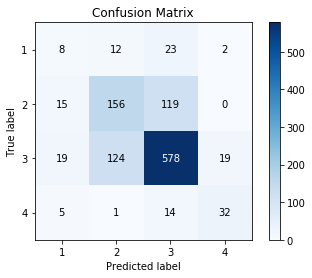

In [84]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_true=np.array(y_test), y_pred=dt.predict(X_test))
plt.show()

### Simple Decision Tree

In [85]:
# split validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# # Build a decision model with max_depth=3 and min_samples_leaf=5
dt_simple = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)
dt_simple.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [86]:
print metrics.accuracy_score(y_test, dt_simple.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, dt_simple.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, dt_simple.predict(X_test))
print "--------------------------------------------------------"

0.6885536823425022
--------------------------------------------------------
[[  0  17  27   1]
 [  0 128 162   0]
 [  0 108 623   9]
 [  0   0  27  25]]
--------------------------------------------------------
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        45
          2       0.51      0.44      0.47       290
          3       0.74      0.84      0.79       740
          4       0.71      0.48      0.57        52

avg / total       0.65      0.69      0.67      1127

--------------------------------------------------------


C:\Users\Aksorn\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


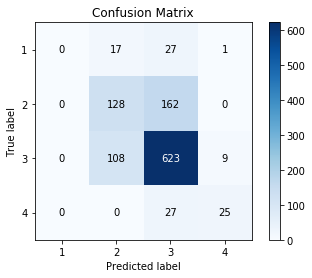

In [87]:
skplt.metrics.plot_confusion_matrix(y_true=np.array(y_test), y_pred=dt_simple.predict(X_test))
plt.show()

### KNN

In [88]:
# declare X variables and y variable
y = final1['category'] 
X = final1.drop(['imdb_score','category'], axis =1)

In [89]:
# evaluate the model 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# initialize KNeighborsClassifier() and train a KNN Model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [90]:
print metrics.accuracy_score(y_test, knn.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, knn.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, knn.predict(X_test))
print "--------------------------------------------------------"

0.6007098491570542
--------------------------------------------------------
[[  0  11  34   0]
 [  1  75 214   0]
 [  7 132 599   2]
 [  0   5  44   3]]
--------------------------------------------------------
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        45
          2       0.34      0.26      0.29       290
          3       0.67      0.81      0.73       740
          4       0.60      0.06      0.11        52

avg / total       0.56      0.60      0.56      1127

--------------------------------------------------------


In [91]:
# evaluate the knn model 
scores = cross_val_score(knn, X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[0.55851064 0.49468085 0.53191489 0.52393617 0.5212766  0.40159574
 0.3962766  0.42287234 0.456      0.67828418]
0.49853480120928645


C:\Users\Aksorn\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Aksorn\Anaconda2\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


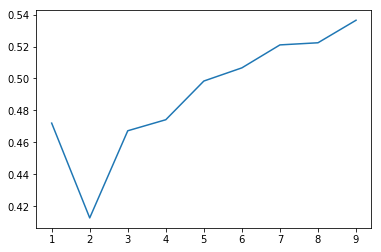

In [92]:
#search for an optimal value of K
from sklearn.grid_search import GridSearchCV

knn = KNeighborsClassifier()
k_range = range(1, 10)
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)

#check the results
grid.grid_scores_
grid_mean_scores = [result[1] for result in grid.grid_scores_]
plt.figure()
plt.plot(k_range, grid_mean_scores)
plt.show()

In [93]:
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

0.536474973376
{'n_neighbors': 9}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')


In [95]:
#new knn model with k = 8
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')

In [96]:
#Model evaluation without valdation
print metrics.accuracy_score(y_test, knn.predict(X_test))
print metrics.confusion_matrix(y_test, knn.predict(X_test))
print metrics.classification_report(y_test, knn.predict(X_test))

0.6069210292812778
[[  0  11  34   0]
 [  0  63 227   0]
 [  0 119 620   1]
 [  0   3  48   1]]
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        45
          2       0.32      0.22      0.26       290
          3       0.67      0.84      0.74       740
          4       0.50      0.02      0.04        52

avg / total       0.54      0.61      0.56      1127



C:\Users\Aksorn\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


KNN uses 8 variables, has a variance of 0.61 when categorizing movies.

### Random Forest

In [97]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=500)    #building 500 decision trees
clf=clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7630878438331854

In [98]:
# generate evaluation metrics
print metrics.accuracy_score(y_test, clf.predict(X_test)) #overall accuracy
print metrics.confusion_matrix(y_test, clf.predict(X_test))
print metrics.classification_report(y_test, clf.predict(X_test))

0.7630878438331854
[[  2  17  25   1]
 [  0 143 147   0]
 [  0  47 690   3]
 [  0   0  27  25]]
             precision    recall  f1-score   support

          1       1.00      0.04      0.09        45
          2       0.69      0.49      0.58       290
          3       0.78      0.93      0.85       740
          4       0.86      0.48      0.62        52

avg / total       0.77      0.76      0.74      1127



In [99]:
pd.DataFrame({'feature':X.columns, 'importance':clf.feature_importances_}).\
                                                    sort_values('importance',ascending=False)

,feature,importance
4,num_voted_users,0.154704
1,duration,0.114568
3,gross,0.090385
7,num_user_for_reviews,0.086129
9,budget,0.078135
0,num_critic_for_reviews,0.077726
12,profit,0.076022
5,cast_total_facebook_likes,0.073233
10,title_year,0.066848
2,director_facebook_likes,0.064345


In [100]:
probs = clf.predict_proba(X_test)
probs = pd.DataFrame(probs, columns=['prob of BAD', 'prob of OKAY', 'prob of GOOD', 'prob of EXCELLENT'])
probs.head()

,prob of BAD,prob of OKAY,prob of GOOD,prob of EXCELLENT
0,0.004,0.244,0.752,0.000
1,0.024,0.786,0.190,0.000
2,0.006,0.362,0.632,0.000
3,0.058,0.440,0.500,0.002
4,0.014,0.052,0.778,0.156


After 500 itereations, the Random Forest model is accurate at 0.792

## Clustering

In [102]:
cluster = final1.drop(['num_critic_for_reviews','director_facebook_likes','gross','cast_total_facebook_likes','facenumber_in_poster','num_user_for_reviews','content_rating','budget','title_year','imdb_score','movie_facebook_likes','profit','category'], axis = 1)
cluster.head()

,duration,num_voted_users
0,178.0,886204
1,169.0,471220
2,148.0,275868
3,164.0,1144337
5,132.0,212204


In [103]:
# Normalize data
norm = (cluster - cluster.mean()) / (cluster.max() - cluster.min())
norm.head()

,duration,num_voted_users
0,0.231201,0.461851
1,0.200485,0.216251
2,0.128812,0.100636
3,0.183420,0.614622
5,0.074205,0.062957


In [104]:
k_means = KMeans(init='k-means++', n_clusters=4, random_state=0)
k_means.fit(norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [105]:
k_means.labels_

array([3, 1, 1, ..., 0, 0, 0])

In [106]:
cluster2 = pd.DataFrame(k_means.labels_, columns = ['cluster'])
cluster2.head()

,cluster
0,3
1,1
2,1
3,3
4,2


In [107]:
cluster3 = norm.join(cluster2)
cluster3.head()

,duration,num_voted_users,cluster
0,0.231201,0.461851,3.0
1,0.200485,0.216251,1.0
2,0.128812,0.100636,1.0
3,0.183420,0.614622,3.0
5,0.074205,0.062957,1.0


In [108]:
cluster3.groupby(['cluster']).mean() 

,duration,num_voted_users
cluster,,
0.0,-0.000143,-0.003078
1.0,0.028339,0.039872
2.0,0.006374,0.008193
3.0,0.068541,0.071113


- Cluster 0 has a short duration and low number of user votes
- Cluster 1 has a long duration and high number of user votes
- Cluster 2 has a medium duration and medium number of user votes
- Cluster 3 has a medium duration and low number of user votes

In [109]:
cluster4 = cluster.join(cluster2)
cluster4.head()

,duration,num_voted_users,cluster
0,178.0,886204,3.0
1,169.0,471220,1.0
2,148.0,275868,1.0
3,164.0,1144337,3.0
5,132.0,212204,1.0


In [110]:
cluster4.groupby('cluster').size()

cluster
0.0    2100
1.0     358
2.0     708
3.0      47
dtype: int64

- Cluster 1 has 2100 movies
- Cluster 2 has 358 movies
- Cluster 3 has 708 movies
- Cluster 4 has 47 movies

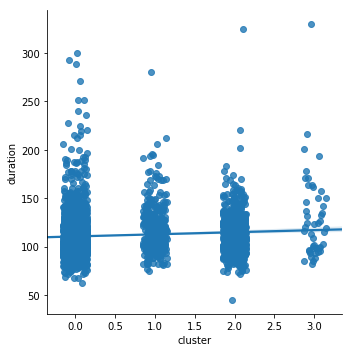

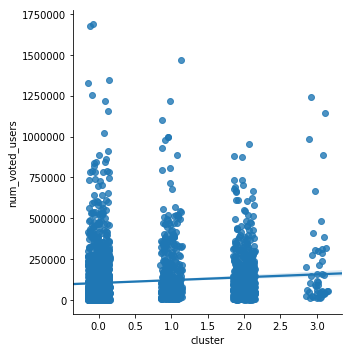

In [112]:
sns.lmplot("cluster", "duration", cluster4, x_jitter=.15, y_jitter=.15)
sns.lmplot("cluster", "num_voted_users", cluster4, x_jitter=.15, y_jitter=.15)

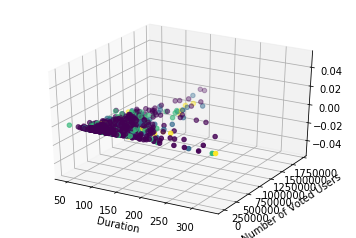

In [115]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = cluster4['duration']
y = cluster4['num_voted_users']
colors = cluster4['cluster']

ax.scatter(x, y, c=colors, marker='o')
ax.set_xlabel('Duration')
ax.set_ylabel('Number of Voted Users')

plt.show()

### Optimal K value (Elbow Method)

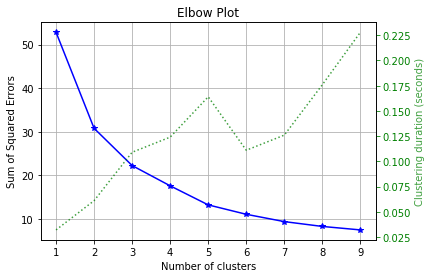

In [116]:
import scikitplot as skplt

kmeans = KMeans(random_state=1) 
skplt.cluster.plot_elbow_curve(kmeans, norm, cluster_ranges=range(1, 10))

## Storytelling

- Overall, duration and the number of voters were the most important factors in predicting a movie's success.
- The Random Forest model with 500 iterations of predicting is 79.2% effective placing a movie in the right category.